Predicted values:  [85.09999999999997, 97.79999999999995, 100.30000000000018, 81.0]
True values:  [87.1, 105.7, 124.1, 139.6]
For the years:  [1990, 2000, 2010, 2020]


Mean Square Error:  1016.7024999999978
Root Mean Square Error:  31.885772689398603
R-squared:  -1.6240742801928572


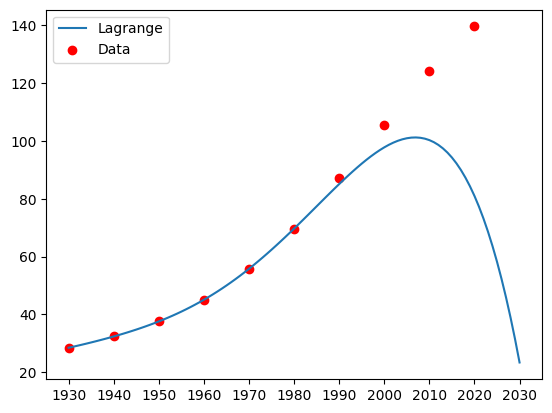

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import math

#List slicing in python, Consider any list X
#X[:i]+X[i+1:] means all the elements of X except the ith one
#X[:i] means all the elements of X from 0 to i-1 (i-1 because i is excluded)
#X[i+1:] means all the elements of X from i+1 to the end of the list

# Lagrange Interpolation
def lagrange_interpolate(X,Y,x):    #X and Y are lists of x and y coordinates respectively
                #x is the point at which we want to find the value of the polynomial

    polynomial=0        #initializing the polynomial 
    def numerator(i):    #defining the numerator of the ith term of the polynomial
        prod_numerator=1   #initializing the numerator of the ith term of the polynomial as 1
        for alpha in X[:i]+X[i+1:]:  #for all the x coordinates except the ith one
            prod_numerator*=(x-alpha)  #multiply the numerator by (x-x_i)
        return prod_numerator  
    def denominator(i):   #defining the denominator of the ith term of the polynomial 
        prod_denominator=1  #initializing the denominator of the ith term of the polynomial as 1
        for alpha in X[:i]+X[i+1:]:  #for all the x coordinates except the ith one
            prod_denominator*=(X[i]-alpha)  #multiply the denominator by (x_i-x_j)
                                            #j from 0 to n, j!=i
        return prod_denominator 
    for i in range(len(X)):
        polynomial+=numerator(i)*Y[i]/denominator(i) #adding the ith term of the polynomial
    
    return polynomial

X_full=[1930,1940,1950,1960,1970,1980,1990,2000,2010,2020]   #X coordinates of the data points
Y_full=[28.5,32.4,37.6,45.1,55.8,69.7,87.1,105.7,124.1,139.6] #Y coordinates of the data points
X_feed=[1930,1940,1950,1960,1970,1980]   #X coordinates of the data points used for interpolation
Y_feed=[28.5,32.4,37.6,45.1,55.8,69.7]   #Y coordinates of the data points used for interpolation
X_predict=[1990,2000,2010,2020]   #X coordinates of the data points to be predicted
Y_true=[87.1,105.7,124.1,139.6]  #True values of the function at the points to be predicted
 



x_for_plotting=np.arange(1930,2031,1)  #dividing the range into 1000 points for plotting, from 1930 to 2030
                    #since np.arange(a,b,1) excludes b, we take b+1, where 1 is the step size
y_for_plotting=[]
for x in x_for_plotting:
    y_for_plotting.append(lagrange_interpolate(X_feed,Y_feed,x))  #calculating the y coordinates of the points to be plotted

Y_predicted=[]
#calculating the predicted values of the function at the points to be predicted
for x in X_predict:
    Y_predicted.append(lagrange_interpolate(X_feed,Y_feed,x)) 



print("Predicted values: ",Y_predicted)
print("True values: ",Y_true)
print("For the years: ",X_predict)
print("\n")
square_error=0

for i in range(len(Y_predicted)):
    square_error+=(Y_predicted[i]-Y_true[i])**2  #calculating the square error

mean_square_error=square_error/len(Y_predicted) #calculating the mean square error



print("Mean Square Error: ",mean_square_error)
print("Root Mean Square Error: ",math.sqrt(mean_square_error))

mean_of_Y_true=0
for i in range(len(Y_true)):
    mean_of_Y_true+=Y_true[i]
mean_of_Y_true/=len(Y_true)

total_sum_of_squares=0  
for i in range(len(Y_true)):
    total_sum_of_squares+=(Y_true[i]-mean_of_Y_true)**2

r_squared=1-(square_error/total_sum_of_squares) #calculating the r-squared value of the model
print("R-squared: ",r_squared)



plt.plot(x_for_plotting,y_for_plotting)
plt.xticks(np.arange(1930,2031,10))
plt.scatter(X_full,Y_full,color="red")
plt.legend(["Lagrange","Data"])
plt.show()